# Water Quality Analysis Prediction


Importing necessary libraries
---



In [78]:
import pandas as pd

In [79]:
import matplotlib.pyplot as plt

In [80]:
import seaborn as sns

In [146]:
import numpy as np

In [81]:
# Importing .csv dataset

In [82]:
from google.colab import files

uploaded = files.upload()

Saving water_potability.csv to water_potability (2).csv


In [83]:
# Reading the dataset

In [84]:
data = pd.read_csv('/content/water_potability.csv')

In [85]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [86]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [87]:
# Data Cleaning 

Checking for Nan values in our dataset

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [89]:
data.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


Since it shows true, this implies there are Nan or NULL values in our dataset

In [90]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [91]:
# total null values =

data.isnull().sum().sum()

1434

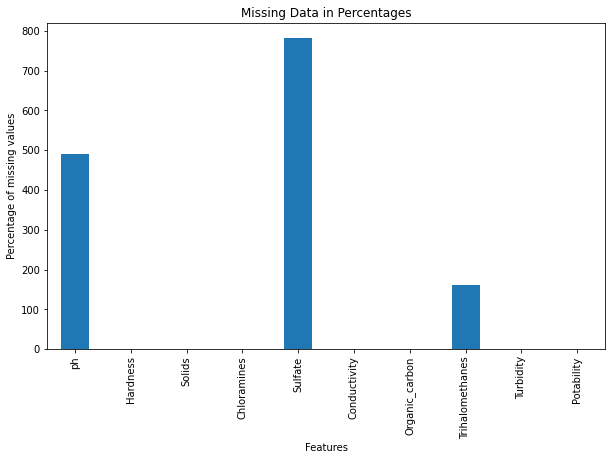

In [92]:
data.isnull().sum().plot.bar(figsize=(10,6))
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

Filling the Nan values with the respective mean

In [93]:
data = data.fillna(data.mean(),)

In [94]:
# Now checking for the Nan values

In [95]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [96]:
data.isnull().sum().sum()

0

In [97]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


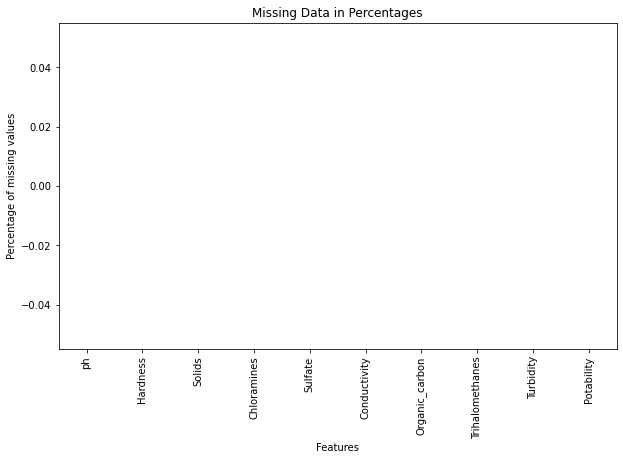

In [206]:
data.isnull().mean().plot.bar(figsize=(10,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

Now we have cleaned the dataset means we have cleaned all the Nan values

In [99]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [100]:
# EDA -> Exploratory Data Analysis

Checking if we need dimensionality reduction

# Heatmap

A Heat map is a graphical representation of multivariate data that is structured as a matrix of columns and rows.

Heat maps are very useful in describing correlation among several numerical variables, visualizing patterns and anomalies

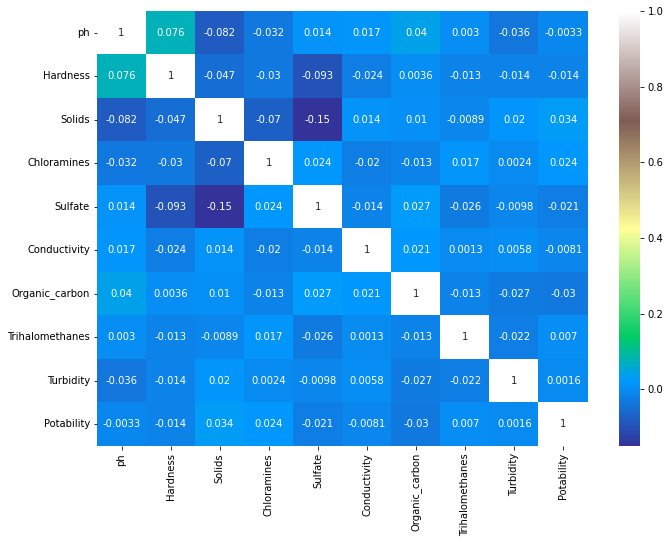

In [101]:
sns.heatmap(data.corr(),annot=True,cmap='terrain')
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.show()

From above data we can coclude we actually don't need any dimensionality reduction here. As we the values are not highly correlated

# Outlier 

Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that will disturb our model, so we need to remove them under *EDA*.

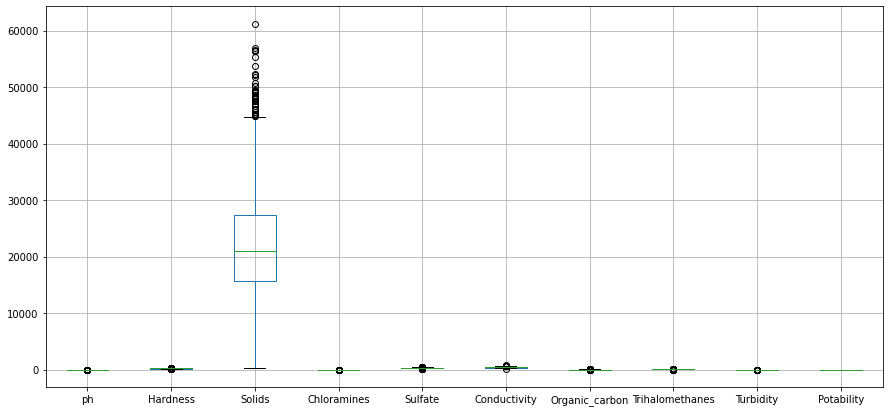

In [102]:
data.boxplot(figsize = (15,7))
plt.show()

In [103]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [104]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

We have decided to not remove that as because solid is also important parmater in deciding the quality of water.

# Label Encoding 

Label Encoder converts Categorical Data to Numerical Data which is not needed here.

## Potablitiy of this Dataset

The Potability column of this dataset is the column we need to predict because it contains values 0 and 1 that indicate whether the water is potable (1) or unfit (0) for consumption. So let’s see the distribution of 0 and 1 in the Potability column

In [105]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


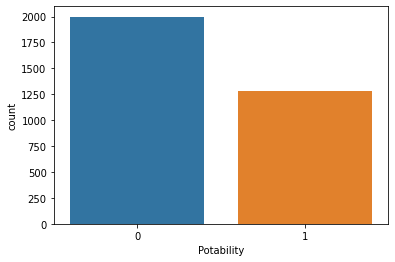

In [106]:
sns.countplot(data['Potability'])
plt.show()

This dataset is imbalanced as no. of 0's are greater than no. of 1's but we cant ignore anything as all the features are very much important for prediction of our model.

In [107]:
# Checking the Normality of our dataset with the help of Histogram

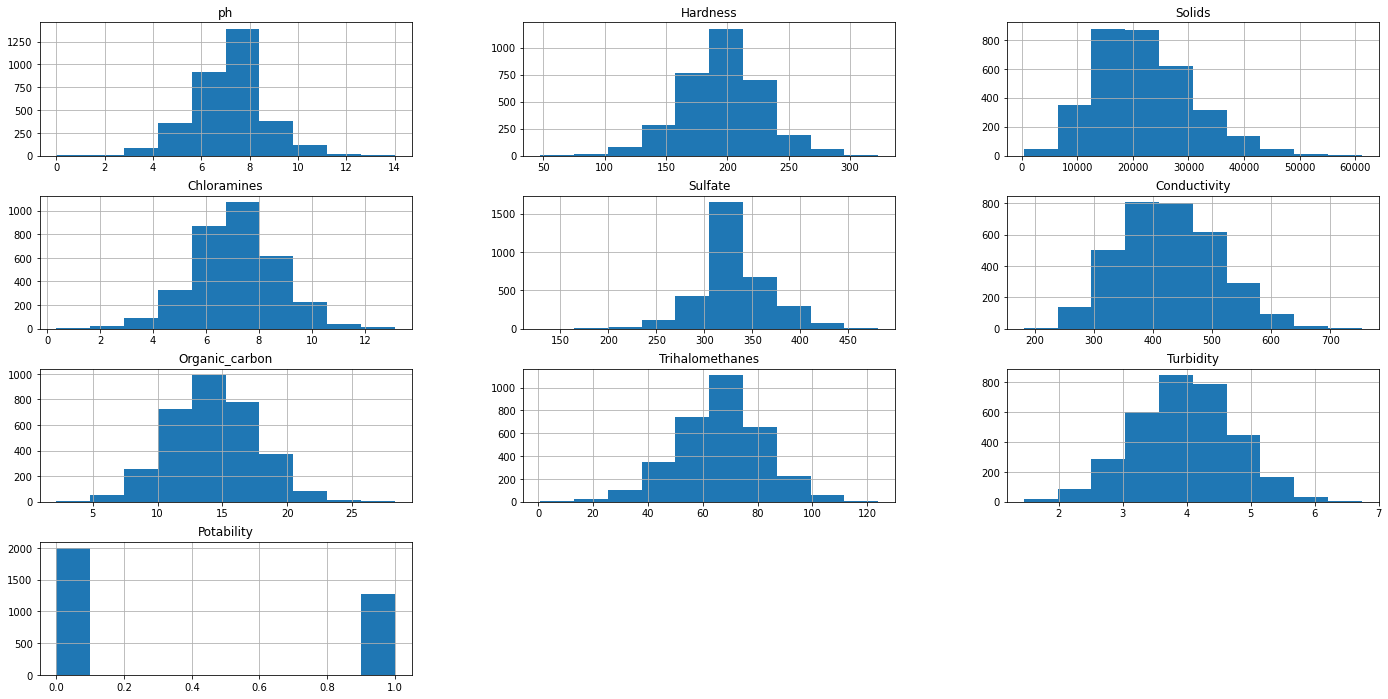

In [108]:
data.hist(figsize = (24,12))
plt.show()

Above dataset is normal

# Partioning



In [111]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


Divide data into x-input variable and y-target variable

In [120]:
X = data.drop('Potability',axis=1) # input variable or input data

In [116]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [121]:
Y = data['Potability'] # target variable

In [118]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

Using train_test_split to split our data into train and test data

In [123]:
#importing from sklearn

from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, shuffle = True, random_state = 101) # 101 denotes the shuffling order

In [125]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
748,6.750761,207.254505,23642.992597,7.691012,293.783040,446.696939,6.000391,30.900815,2.777726
2279,7.539742,201.959317,26716.359708,5.637350,333.775777,516.354560,14.985649,83.536821,4.210678
1960,8.128270,231.167537,19954.575554,5.138838,349.067363,386.071149,15.018085,63.340968,4.678742
1491,7.368166,204.041451,8524.874646,9.469763,429.814322,328.565288,11.173155,88.888819,3.684263
2991,6.628256,198.865743,15911.357509,7.517906,342.015924,437.918625,15.005742,38.845958,4.464457
...,...,...,...,...,...,...,...,...,...
599,7.080795,205.638790,39742.970329,4.660528,323.956492,509.546419,11.674850,55.042679,3.916746
1599,8.227083,274.351887,40546.956332,7.130161,241.446917,417.673702,9.809669,79.397105,3.619182
1361,4.906492,173.779159,14786.138901,5.843757,267.561144,620.346840,7.775896,38.794307,3.152345
1547,6.217585,203.707222,15597.640883,7.751461,361.247810,452.922025,14.597145,70.850977,4.150167


In [126]:
Y_train

748     1
2279    0
1960    1
1491    1
2991    0
       ..
599     0
1599    1
1361    0
1547    1
863     0
Name: Potability, Length: 2620, dtype: int64

In [127]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2541,5.735724,158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954
2605,8.445219,228.522860,28966.569327,6.179855,333.775777,361.705354,14.554220,60.612230,4.400706
330,6.737004,220.100102,24694.744205,8.373660,333.775777,384.308673,6.748092,8.175876,4.063170
515,5.701155,233.515043,41411.601707,5.895464,310.160545,509.767888,22.686837,73.751883,3.403136
400,6.259652,208.379430,37356.746401,8.565487,256.473839,380.240193,5.567693,68.441865,4.213405
...,...,...,...,...,...,...,...,...,...
482,7.705711,178.922858,18476.619166,8.226228,334.889911,518.043369,10.638798,63.157489,3.861956
2970,10.933111,162.424918,18846.634913,7.085261,333.775777,593.725764,14.977233,60.690580,3.894989
50,7.080795,168.388431,27492.307307,7.046225,299.820478,383.795020,16.182066,75.729434,3.048057
839,7.611610,222.252269,25063.683013,8.561124,287.948123,505.265483,18.273757,68.395413,2.873261


In [128]:
Y_test

2541    0
2605    0
330     1
515     0
400     1
       ..
482     0
2970    0
50      0
839     0
374     1
Name: Potability, Length: 656, dtype: int64

In [141]:
X_test.shape

(656, 9)

In [142]:
Y_test.shape

(656,)

In [143]:
Y_train.shape

(2620,)

In [144]:
X_train.shape

(2620, 9)

# Model Training

Following are the list of algorithms that are used in this notebook.
* Logistic Regression
* Decision Tree
* Random Forest
* XGBoost
* KNeighbours
* SVM
* AdaBoost

This model is an eg. of classifiaction problem so we mainly use classification algorithm with our each train data and then predict the data with respect to the test values in every algorithm

#1. Decision Trees

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
dt = DecisionTreeClassifier()

In [135]:
# Training Model
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [136]:
# Making Prediction
dt_predict = dt.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [138]:
# Calculating accuracy scores

In [139]:
dt_acc = accuracy_score(Y_test,dt_predict)
dt_acc

0.5807926829268293

In [140]:
# Confusion Matrix 

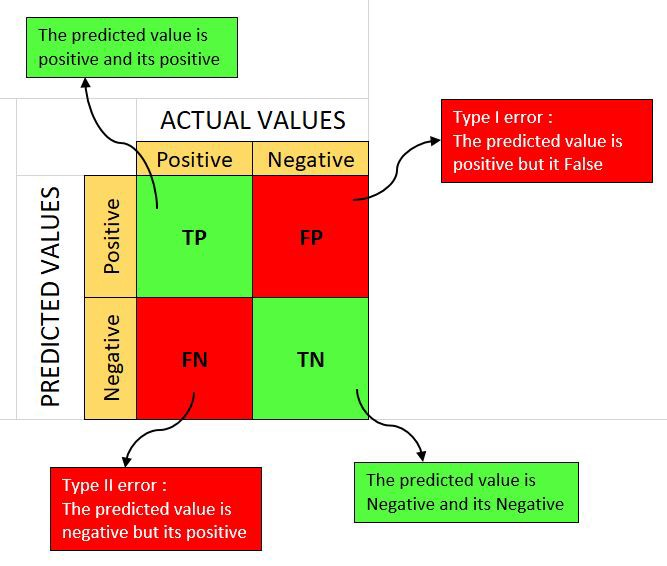

What is Confusion Matrix and why you need it? Well, it is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

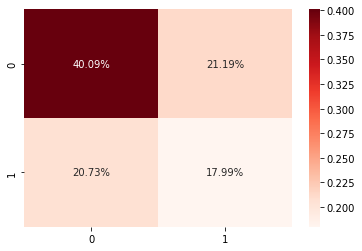

In [149]:
cm1 = confusion_matrix(Y_test,dt_predict)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

In [148]:
confusion_matrix(Y_test,dt_predict)

array([[263, 139],
       [136, 118]])

In [150]:
# confusion matrix -> false +ve, false -ve , true +ve, true -ve

# 2.Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression

In [152]:
lg = LogisticRegression()

In [154]:
# Training Model
lg.fit(X_train,Y_train)

LogisticRegression()

In [155]:
# Making Prediction
lg_predict = lg.predict(X_test)

In [157]:
# Calculating accuracy scores
lg_acc = accuracy_score(Y_test,lg_predict)
lg_acc

0.6128048780487805

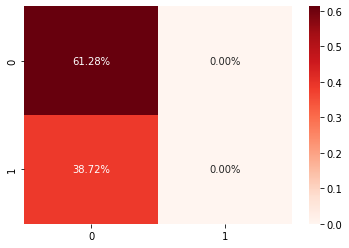

In [159]:
cm2 = confusion_matrix(Y_test,lg_predict)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

In [160]:
confusion_matrix(Y_test,lg_predict)

array([[402,   0],
       [254,   0]])

# 3. Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
rf = RandomForestClassifier()

In [164]:
# Training Model
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [165]:
# Making Prediction
rf_predict = rf.predict(X_test)

In [171]:
# Calculating Accuracy
rf_acc = accuracy_score(Y_test,rf_predict)
rf_acc

0.6875

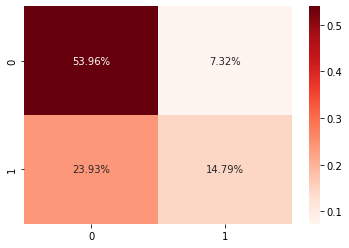

In [172]:
cm3 = confusion_matrix(Y_test,rf_predict)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

In [169]:
confusion_matrix(Y_test,rf_predict)

array([[354,  48],
       [157,  97]])

# 4. XGBoost Classifier

In [173]:
from xgboost import XGBClassifier

In [174]:
xgb = XGBClassifier()

In [175]:
# Training Model
xgb.fit(X_train,Y_train)

XGBClassifier()

In [177]:
# Making Predictions
xgb_predict = xgb.predict(X_test)

In [178]:
# Calculating Accuracy

xgb_acc = accuracy_score(Y_test,xgb_predict)
xgb_acc

0.6615853658536586

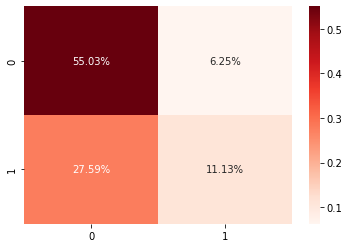

In [179]:
cm4 = confusion_matrix(Y_test,xgb_predict)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

In [180]:
confusion_matrix(Y_test,xgb_predict)

array([[361,  41],
       [181,  73]])

# 5. KNeighbors Classifier

In [181]:
from sklearn.neighbors import KNeighborsClassifier

In [182]:
kn = KNeighborsClassifier()

In [183]:
# Training Model
kn.fit(X_train,Y_train)

KNeighborsClassifier()

In [184]:
# Making Predictions
kn_predict = kn.predict(X_test)

In [185]:
# Calculating accuracy scores
kn_acc = accuracy_score(Y_test,kn_predict)
kn_acc

0.5701219512195121

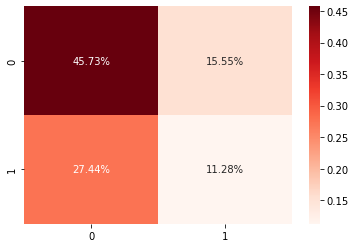

In [186]:
cm5 = confusion_matrix(Y_test,kn_predict)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

In [187]:
confusion_matrix(Y_test,kn_predict)

array([[300, 102],
       [180,  74]])

# 6. SVM

In [188]:
from sklearn.svm import SVC, LinearSVC

In [189]:
svm = SVC()

In [190]:
# Training Model
svm.fit(X_train,Y_train)

SVC()

In [191]:
# Making Predictions
svm_predict = svm.predict(X_test)

In [194]:
# Calculating accuracy scores
svm_acc = accuracy_score(Y_test,svm_predict)
svm_acc

0.6128048780487805

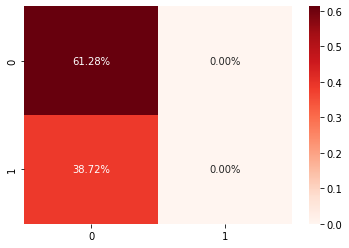

In [195]:
cm6 = confusion_matrix(Y_test,svm_predict)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

In [196]:
confusion_matrix(Y_test,svm_predict)

array([[402,   0],
       [254,   0]])

# 7. AdaBoost Classifier

In [197]:
from sklearn.ensemble import AdaBoostClassifier

In [198]:
ada = AdaBoostClassifier()

In [199]:
# Training Model
ada.fit(X_train,Y_train)

AdaBoostClassifier()

In [200]:
# Making Predictions
ada_predict = ada.predict(X_test)

In [202]:
# Calclating accuracy scores
ada_acc = accuracy_score(Y_test,ada_predict)
ada_acc

0.6158536585365854

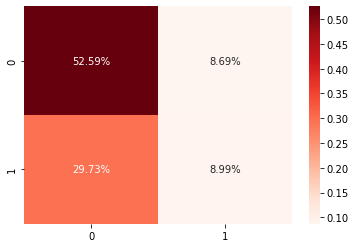

In [203]:
cm7 = confusion_matrix(Y_test,ada_predict)
sns.heatmap(cm7/np.sum(cm7), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.show()

In [204]:
confusion_matrix(Y_test,ada_predict)

array([[345,  57],
       [195,  59]])

# Concluding the Predictions of our 7 Algorithms

,Model,Accuracy_score
2,Random Forest,0.687500
3,XGBoost,0.661585
6,AdaBoost,0.615854
0,Logistic Regression,0.612805
5,SVM,0.612805
1,Decision Tree,0.580793
4,KNeighbours,0.570122


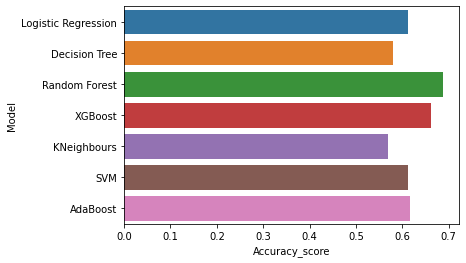

In [205]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy_score' :[lg_acc, dt_acc, rf_acc, xgb_acc, kn_acc, svm_acc, ada_acc]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

Here Random Forest achieved the highest accuracy.